In [128]:
import rasterio as rio
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from pywecs import denoise_swt, WECS, segment2d

In [129]:
# read data paths
directory = '../data'
files = [directory + "/" + f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.startswith('raster')]

In [130]:
# regex function for ordering files
def extract_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else float('inf')

In [131]:
sorted_files = sorted(files, key=extract_number)
print(f'{len(sorted_files)} raster files were found.')

81 raster files were found.


In [132]:
# initialize data cube
X = []

# read data and concatenate raster cube
start = time.time()
for n, i in enumerate(sorted_files):
    temp = rio.open(i)
    X.append(temp.read())
    temp.close()
    print(str(n+1), "/", str(len(sorted_files)), ": ", sorted_files[n], end='\r')
X = np.concatenate(X)
end = time.time()
elapsed_time = end - start
print(f"\nRaster concatenation elapsed time: {elapsed_time:.2f} seconds.")

81 / 81 :  ../data/raster_81.tif
Raster concatenation elapsed time: 15.55 seconds.


In [133]:
# reduce image dimension for wavelet transform
X = X[:,:,:-3]

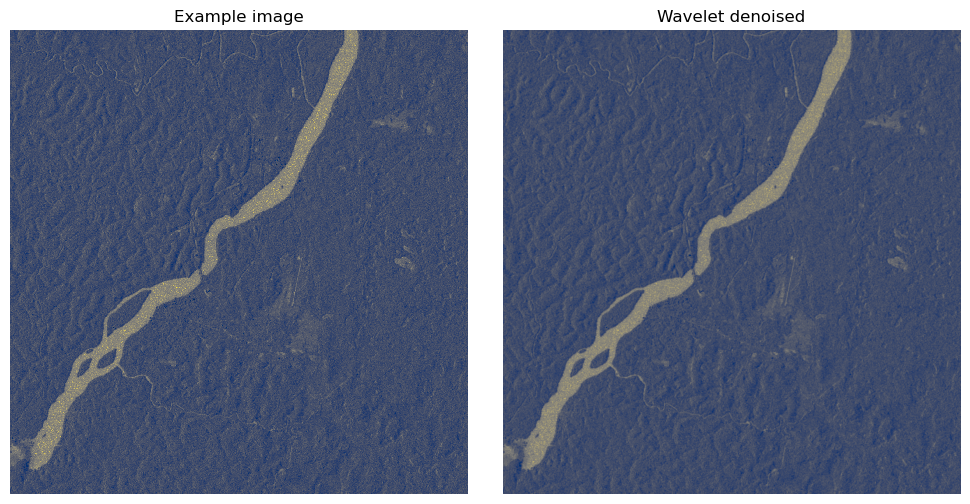

In [134]:
example = X[0]
denoised = denoise_swt(X[0])
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(example, cmap='cividis', interpolation='nearest')
axes[0].set_title('Example image')
axes[0].axis('off')  
axes[1].imshow(denoised, cmap='cividis')
axes[1].set_title('Wavelet denoised')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [135]:
start = time.time()
wecs = WECS(X)
end = time.time()
elapsed_time = end - start
print(f"WECS elapsed time: {elapsed_time:.2f} seconds.")

WECS elapsed time: 308.74 seconds.


In [136]:
otsu_classified_wecs = segment2d(wecs, method='ot')
ki_classified_wecs = segment2d(wecs, method='ki')
kmeans_classified_wecs = segment2d(wecs, method='km')

c:\Users\jpmel\Desktop\Projects\PyWECS\code\pywecs.py:82: RuntimeWarning: invalid value encountered in divide
  sigma_b = np.sqrt(sb/cb - (mb/cb)**2)
c:\Users\jpmel\Desktop\Projects\PyWECS\code\pywecs.py:82: RuntimeWarning: invalid value encountered in sqrt
  sigma_b = np.sqrt(sb/cb - (mb/cb)**2)
c:\Users\jpmel\Desktop\Projects\PyWECS\code\pywecs.py:84: RuntimeWarning: divide by zero encountered in log
  v = p * np.log(sigma_f) + (1-p)*np.log(sigma_b) - p*np.log(p) - (1-p)*np.log(1-p)
c:\Users\jpmel\Desktop\Projects\PyWECS\code\pywecs.py:84: RuntimeWarning: invalid value encountered in multiply
  v = p * np.log(sigma_f) + (1-p)*np.log(sigma_b) - p*np.log(p) - (1-p)*np.log(1-p)


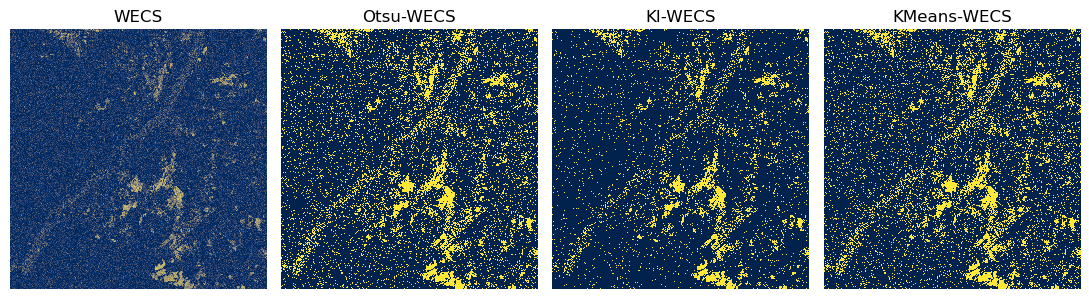

In [137]:
fig, axes = plt.subplots(1, 4, figsize=(11, 8))

axes[0].imshow(wecs, cmap='cividis', interpolation='nearest')
axes[0].set_title('WECS')
axes[0].axis('off')  
axes[1].imshow(otsu_classified_wecs, cmap='cividis', interpolation='nearest')
axes[1].set_title('Otsu-WECS')
axes[1].axis('off')
axes[2].imshow(ki_classified_wecs, cmap='cividis', interpolation='nearest')
axes[2].set_title('KI-WECS')
axes[2].axis('off')
axes[3].imshow(kmeans_classified_wecs, cmap='cividis', interpolation='nearest')
axes[3].set_title('KMeans-WECS')
axes[3].axis('off')

plt.tight_layout()
plt.show()